# 通过随机扭动生成新的图片

<span style="color:red">import library<span>

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [62]:
def randomMoveListGen(length, maxthresh):
    done = False
    while not done:
        tmp = np.random.choice([-1, 0, 1], [length])
        a = 0
        ret = []
        for i in tmp:
            a += i
            ret.append(a)
        ret = np.array(ret)
        ret[ret>maxthresh] = maxthresh
        ret[ret<-maxthresh] = -maxthresh
        cnt = len(ret[ret==maxthresh]) + len(ret[ret==-maxthresh])
        if cnt < length/3:
            done = True
    return ret

In [65]:
def extendBoard(img, axis, b, count):
    #获取边界值
    if axis:
        board = img[:, b].reshape((-1, 1, 3))
    else:
        board = img[b].reshape((1, -1, 3))
    #计算新边界
    if axis:
        ave = np.average(board, axis=0)
    else:
        ave = np.average(board, axis=1)
    board[:, :] = ave
    newboard = np.concatenate([board] * count, axis=axis)
    #
    if not b:
        newimg = np.concatenate([newboard, img], axis=axis)
    else:
        newimg = np.concatenate([img, newboard], axis=axis)
    return newimg

In [66]:
def getExtendedImg(img, ext):
    newimg = extendBoard(img, 0, 0, ext)
    newimg = extendBoard(newimg, 0, -1, ext)
    newimg = extendBoard(newimg, 1, 0, ext)
    newimg = extendBoard(newimg, 1, -1, ext)
    return newimg

In [57]:
path = os.getcwd() + '/test3'

In [72]:
img = cv2.imread(path+'/'+'OBFR.png')
newimg = getExtendedImg(img, 50)

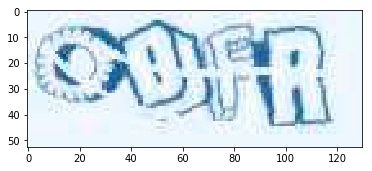

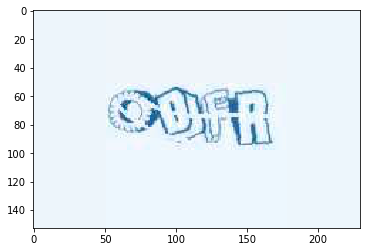

In [73]:
plt.imshow(img)
plt.show()
plt.imshow(newimg)
plt.show()

In [116]:
def getTransformImg(img, maxthresh):
    m, n, _ = img.shape
    retimg = np.zeros(img.shape, dtype='uint8')
    newimg = getExtendedImg(img, maxthresh)
    rows = randomMoveListGen(m+2*maxthresh, maxthresh) + maxthresh
    cols = randomMoveListGen(n+2*maxthresh, maxthresh) + maxthresh
    print cols
    for i, j in enumerate(rows[maxthresh:maxthresh+m]):
        retimg[i, :] = newimg[i, j:j+n]
    for i, j in enumerate(cols[maxthresh:maxthresh+n]):
        retimg[:, i] = newimg[j:j+m, i]
    return retimg

[ 5  6  6  6  5  6  6  5  4  3  2  2  1  2  2  3  3  4  5  5  5  5  4  5  5
  5  4  3  3  4  3  4  4  4  5  5  5  6  5  4  3  3  4  5  6  7  6  6  7  6
  7  6  5  6  7  6  6  5  6  5  5  6  7  8  8  8  7  6  5  5  5  6  6  7  6
  5  4  4  3  4  5  4  5  4  4  5  6  5  6  7  7  7  7  8  8  7  7  7  7  6
  5  5  6  5  4  5  5  5  4  5  5  5  4  4  5  5  5  5  5  5  6  5  6  7  8
  9  8  7  8  9 10 10 10  9 10  9  8  7  6  6]


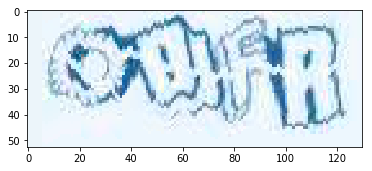

In [124]:
retimg = getTransformImg(img, 5)
plt.imshow(retimg)
plt.show()